In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# Data Preprocessing
- Here we preprocess the data provided.
- We use only those attributes having numerical attributes.

In [56]:
data = pd.read_csv('football_data.csv')

In [57]:
data_with_numerical_attributes = data.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club','Club Logo','Value','Wage','Preferred Foot','Work Rate',
                       'Body Type','Real Face','Position','Release Clause', 'Joined', 'Loaned From','Contract Valid Until','Height',
                       'Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
                       'RDM','RWB','LB','LCB','CB','RCB','RB'])

In [58]:
data_with_numerical_attributes.head()

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [59]:
data_with_numerical_attributes.drop('Unnamed: 0', axis=1, inplace=True)

In [60]:
data_with_numerical_attributes.fillna(0, inplace = True)

# Agglomerative Hierarchical Clustering


In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [9]:
K = [2,4,6,8,10,13,16,20,30,40,50,60,70,80,90,100]

models = []
sses = []
scores = []
samples = []
distortion = []
for k in K:
  model = AgglomerativeClustering(k)
  model.fit(X)
  scores.append(silhouette_score(X,model.labels_))
  samples.append(silhouette_samples(X,model.labels_))
  models.append(model)
  print("For "+str(k)+" Silhoutte_Score = "+str(silhouette_score(X,model.labels_)))
  

For 2 Silhoutte_Score = 0.5073361958231114
For 4 Silhoutte_Score = 0.18837562567499577
For 6 Silhoutte_Score = 0.13441940930281684
For 8 Silhoutte_Score = 0.12896108466270323
For 10 Silhoutte_Score = 0.13579267552241642
For 13 Silhoutte_Score = 0.09168987638006626
For 16 Silhoutte_Score = 0.07739100311949994
For 20 Silhoutte_Score = 0.06028753990901501
For 30 Silhoutte_Score = 0.04932659167393442
For 40 Silhoutte_Score = 0.04403630925823989
For 50 Silhoutte_Score = 0.038681747202026794
For 60 Silhoutte_Score = 0.036946518943406746
For 70 Silhoutte_Score = 0.03528860916955315
For 80 Silhoutte_Score = 0.03340351869806525
For 90 Silhoutte_Score = 0.02859176511695008
For 100 Silhoutte_Score = 0.027821885758108077


## Silhouette Score
- Below plots shows the silhouette score plotted for different values for cluster sizes.

Text(0, 0.5, 'Silhoutte Score')

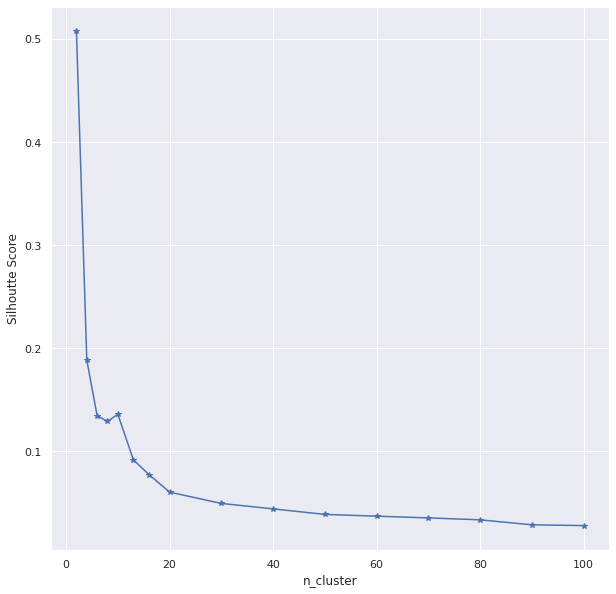

In [10]:
plt.figure(figsize=(10,10))
plt.plot(K,scores,'b-*')
plt.xlabel('n_cluster')
plt.ylabel('Silhoutte Score')

In [11]:
def plot_silhoutte(k,j,kmeans_model,score,sample):
  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (len(K) + 1) * 10])


  y_lower = 10
  for i in range(k):
    ith_val = sample[kmeans_model.labels_ == i]
    ith_val.sort()
    size_cluster_i = ith_val.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(K))
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_val,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 
  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=score, color="red", linestyle="--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

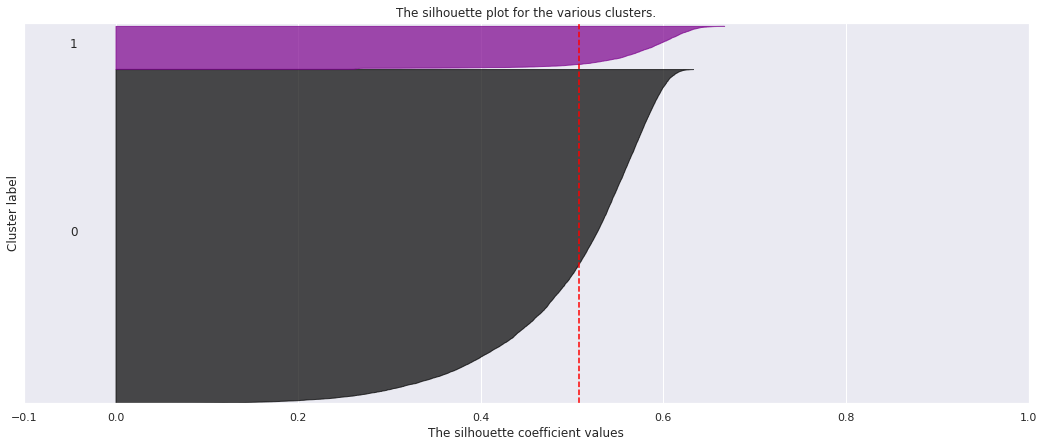

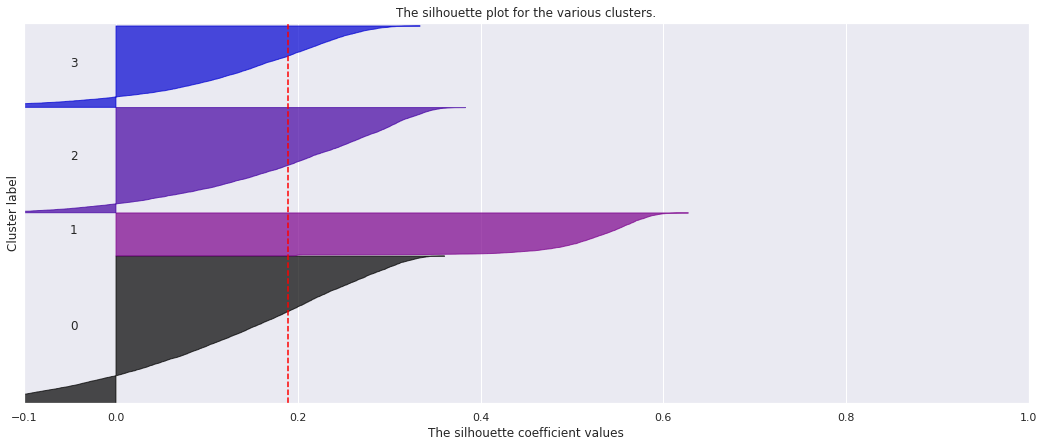

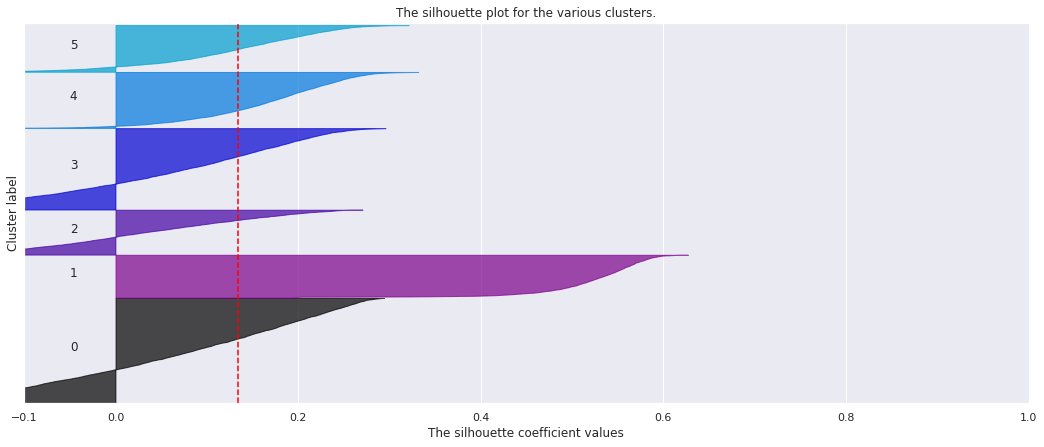

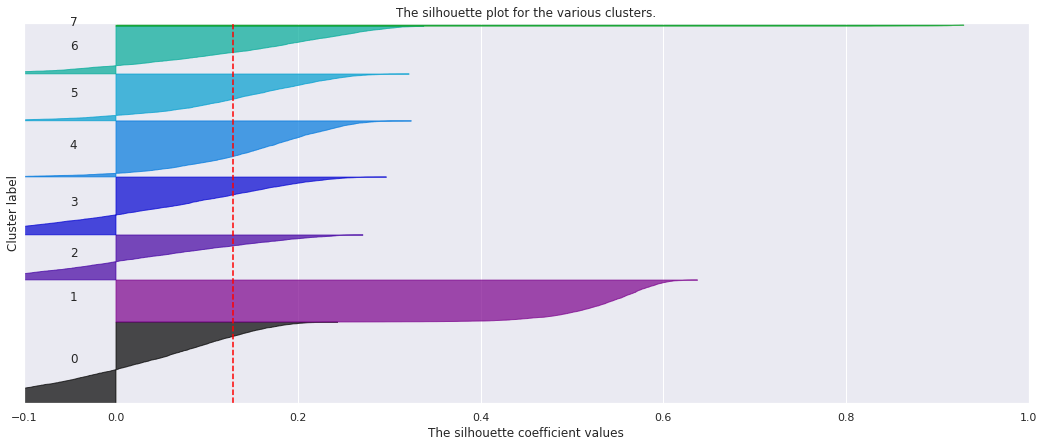

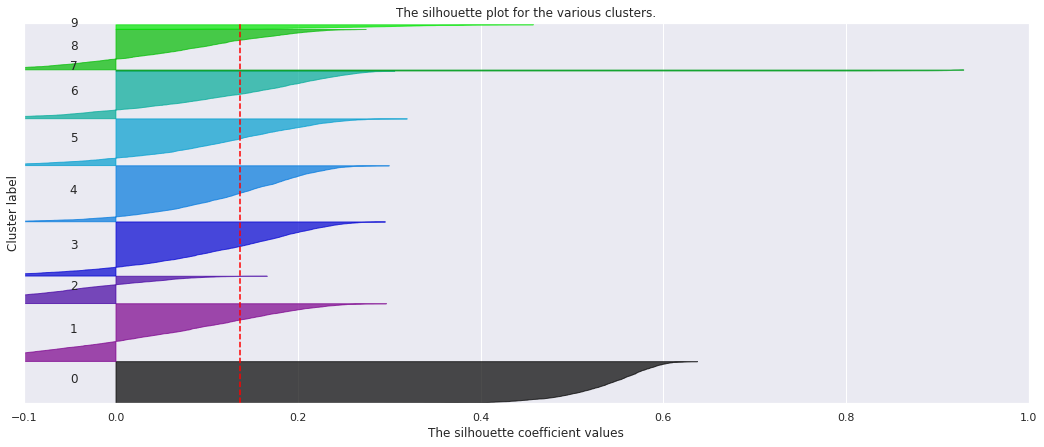

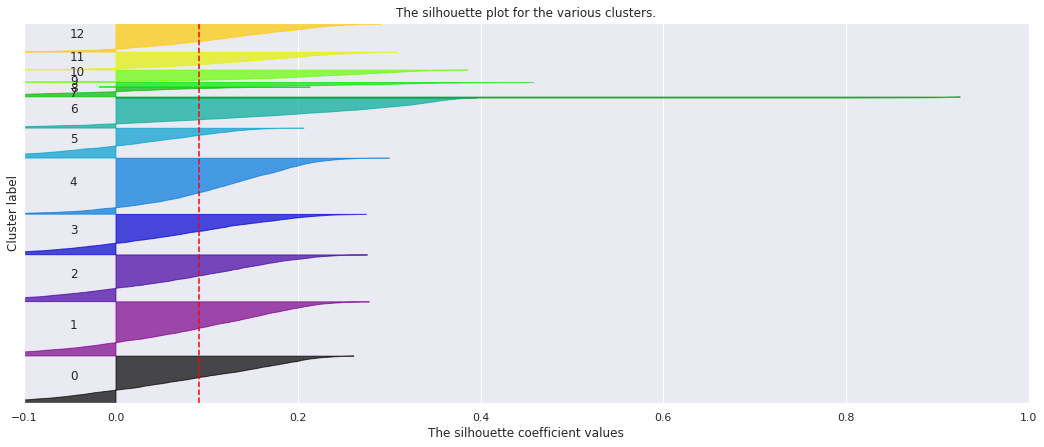

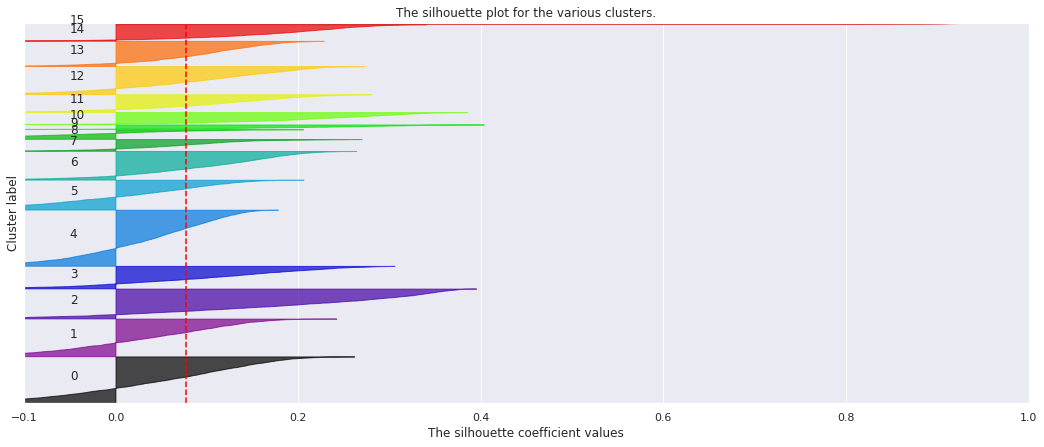

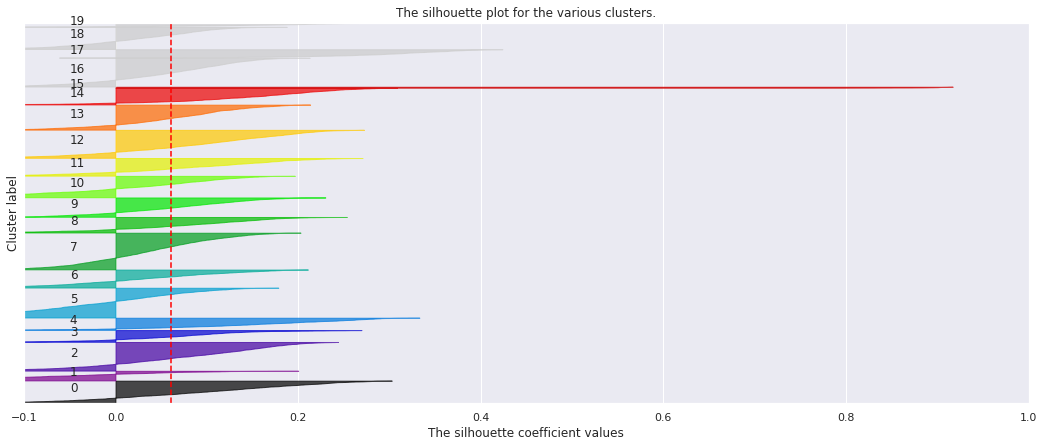

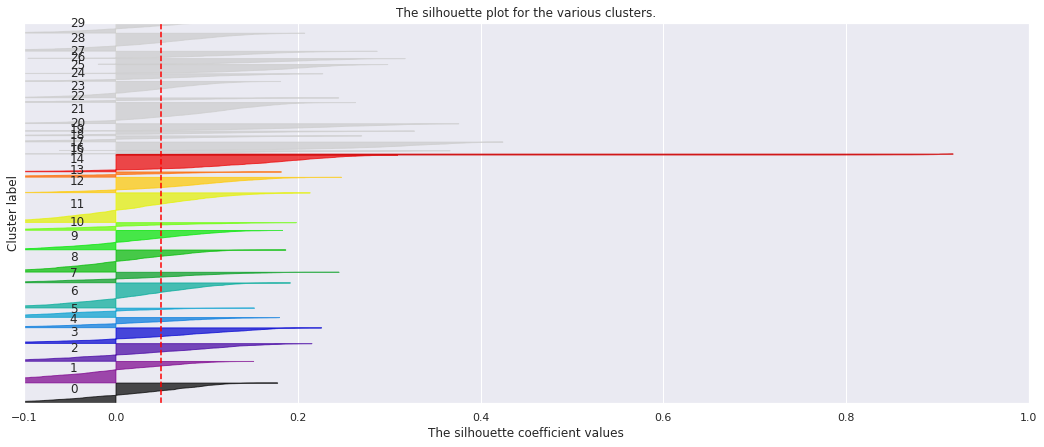

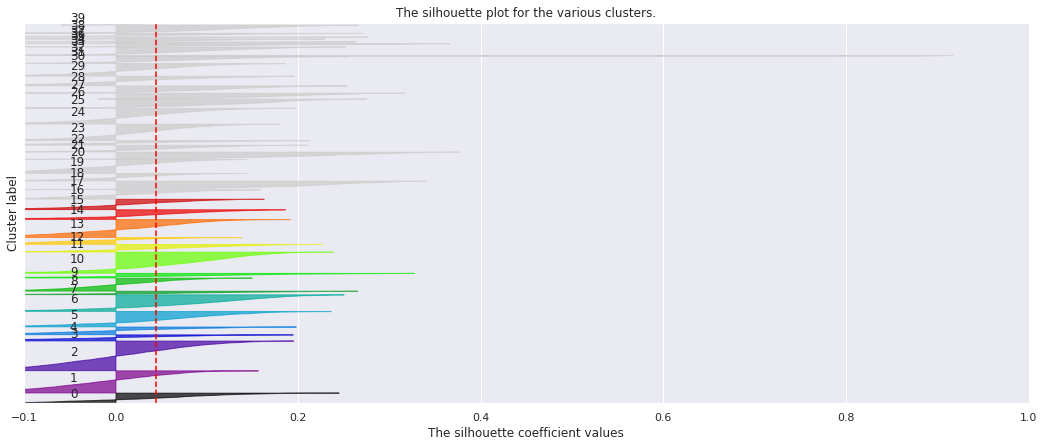

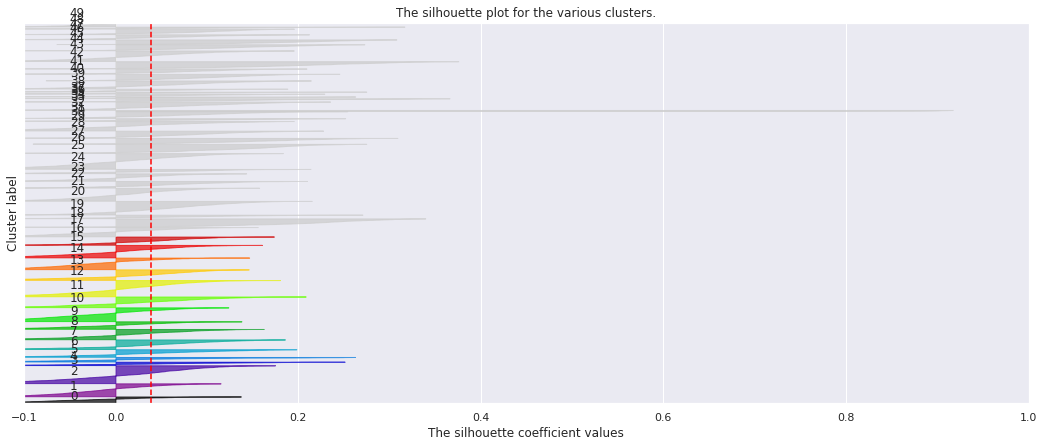

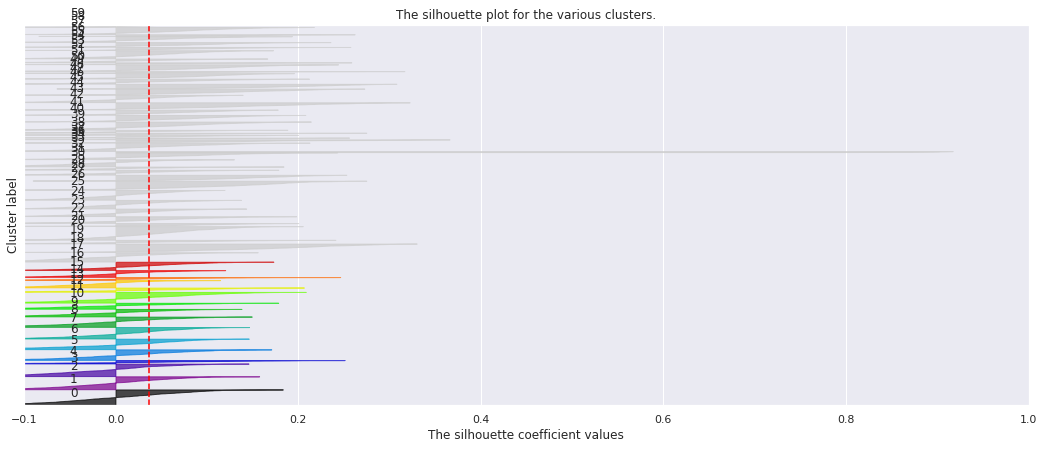

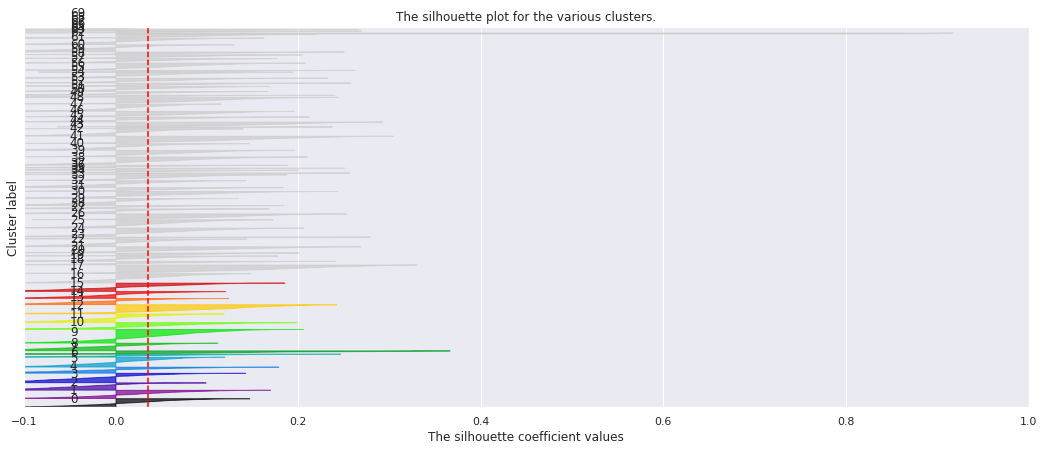

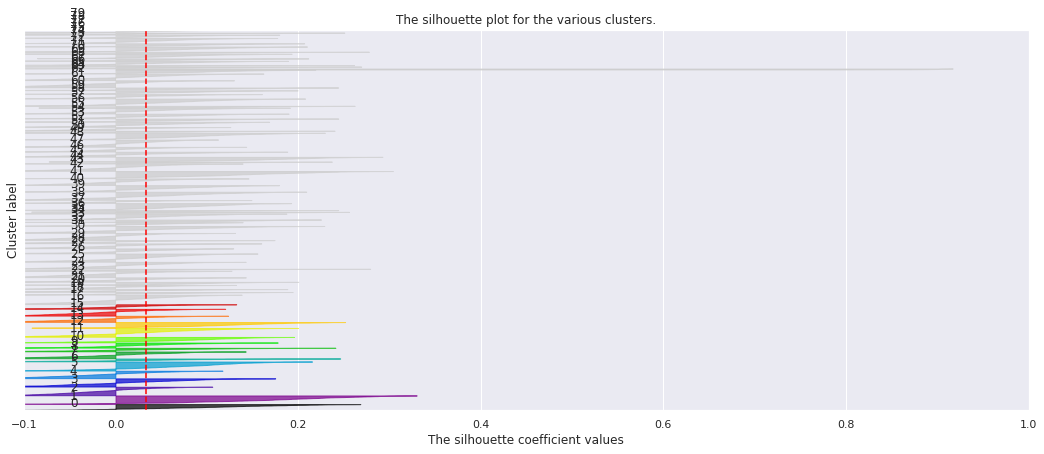

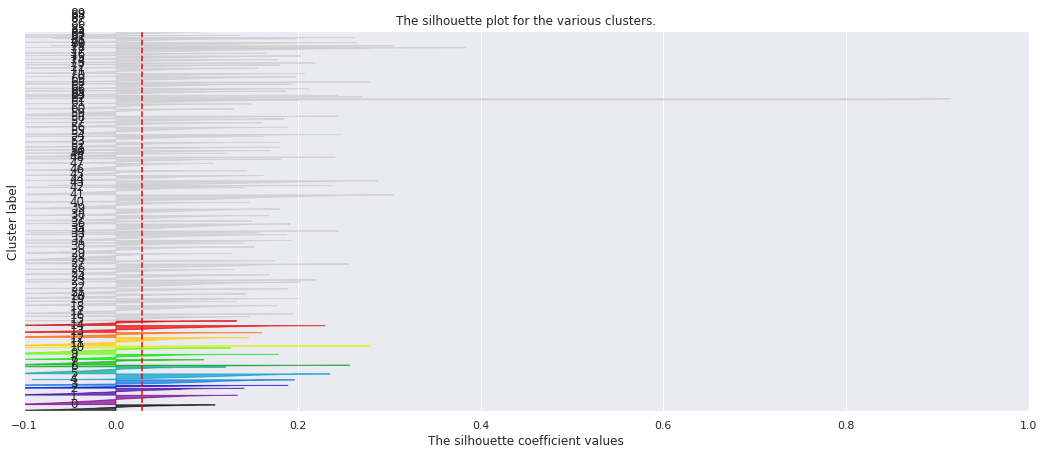

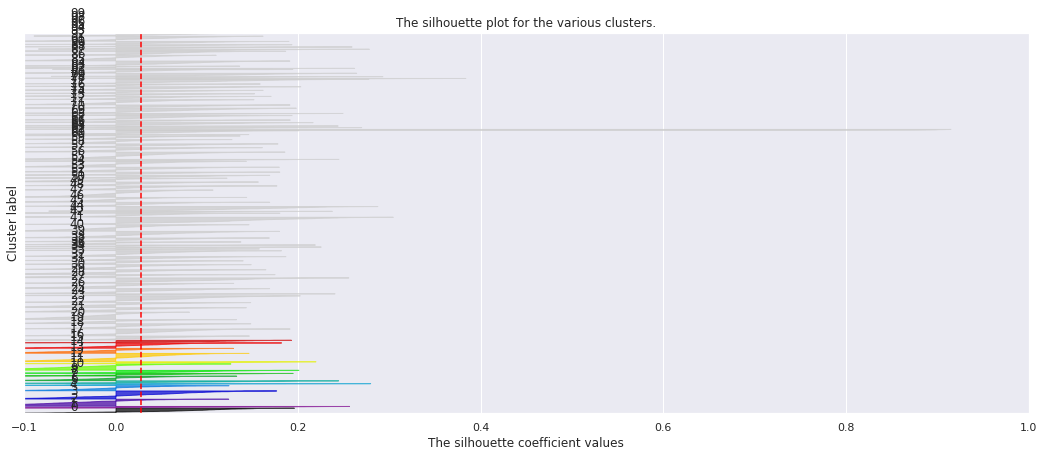

In [12]:
for i in range(len(K)):
  plot_silhoutte(K[i],i,models[i],scores[i],samples[i])

## Dendrogram
- Here we plot the dendrogram for the whole tree

In [50]:
from scipy.cluster.hierarchy import dendrogram

In [51]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    fig,ax = plt.subplots(figsize=(15,15))
    dendrogram(linkage_matrix,ax=ax)


In [52]:
full_tree = AgglomerativeClustering(distance_threshold=0,n_clusters=None).fit(X)

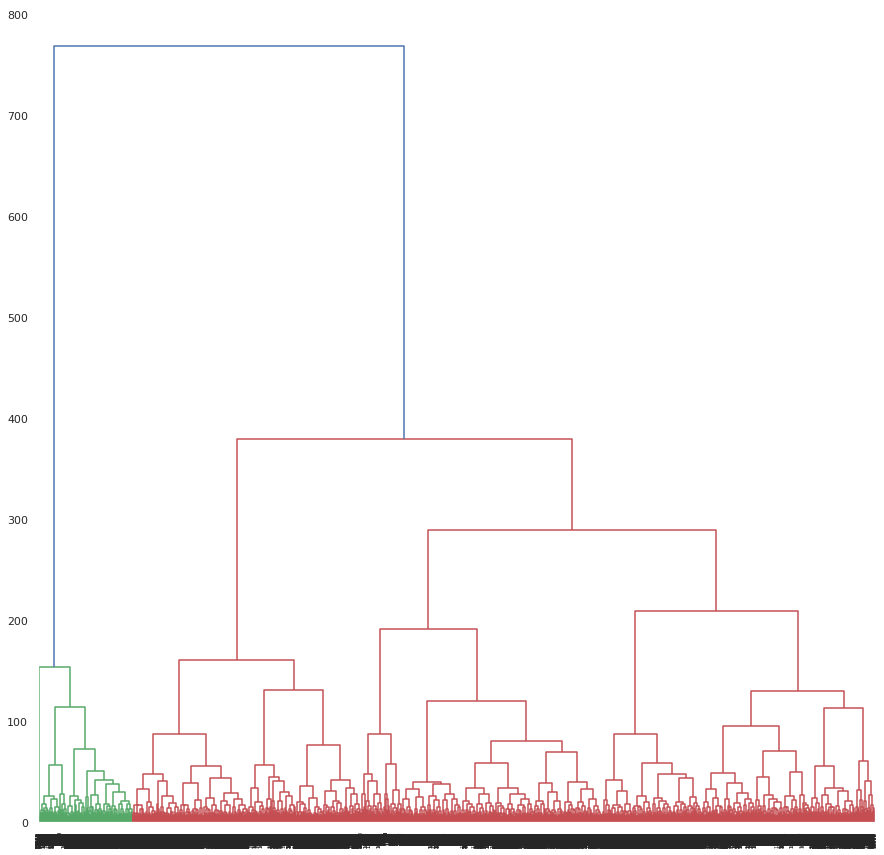

In [53]:
plot_dendrogram(full_tree)

## We choose our optimal k = 11, as there are 11 players in a team
- In this module we try mark each cluster and would see if there are certain attributes that dominate others. 

In [28]:
model = AgglomerativeClustering(11).fit(X)

In [29]:
df = data_with_numerical_attributes
df['labels'] = model.labels_

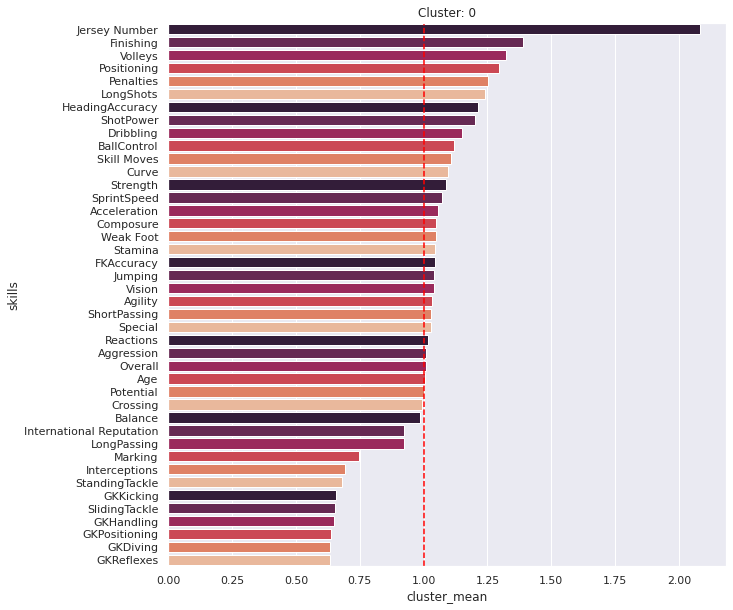

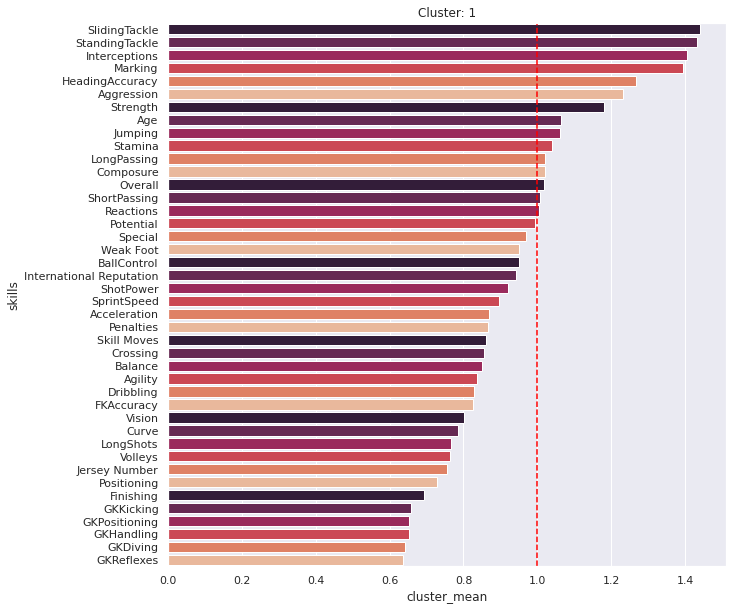

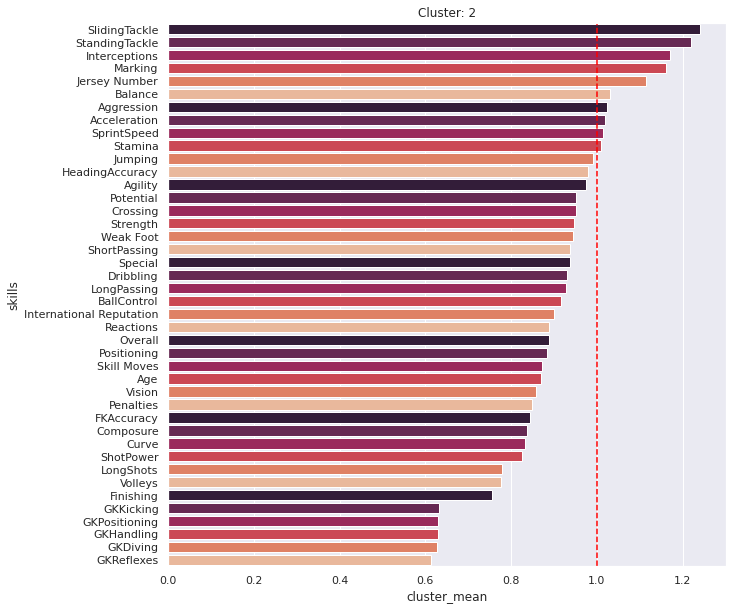

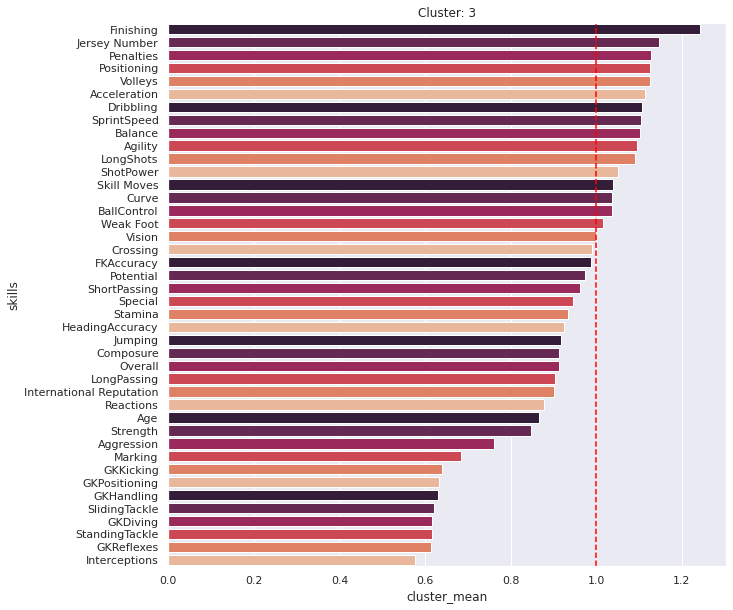

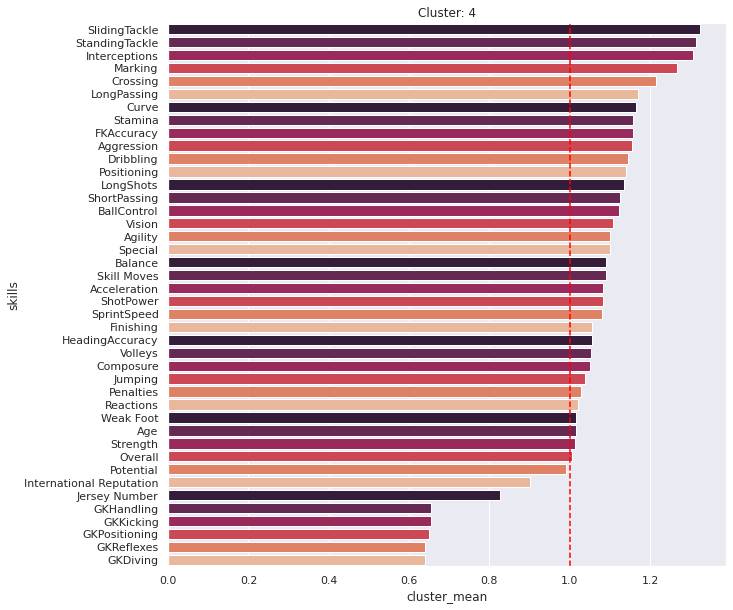

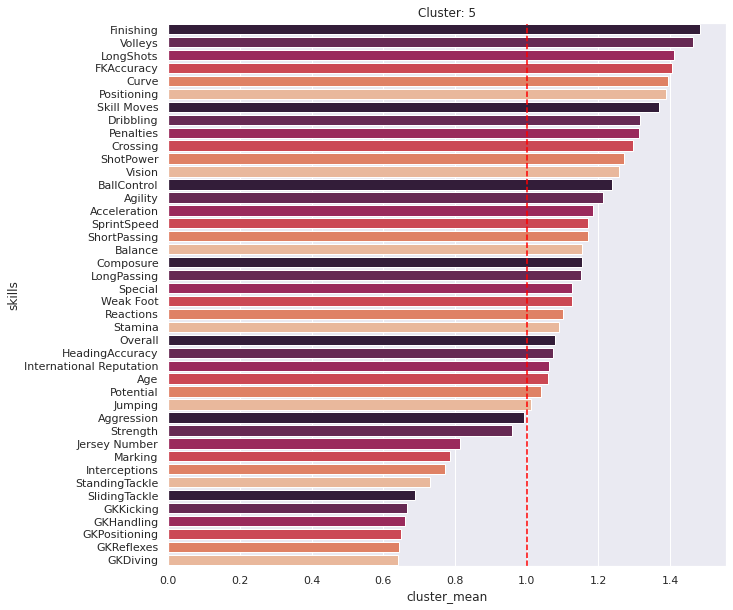

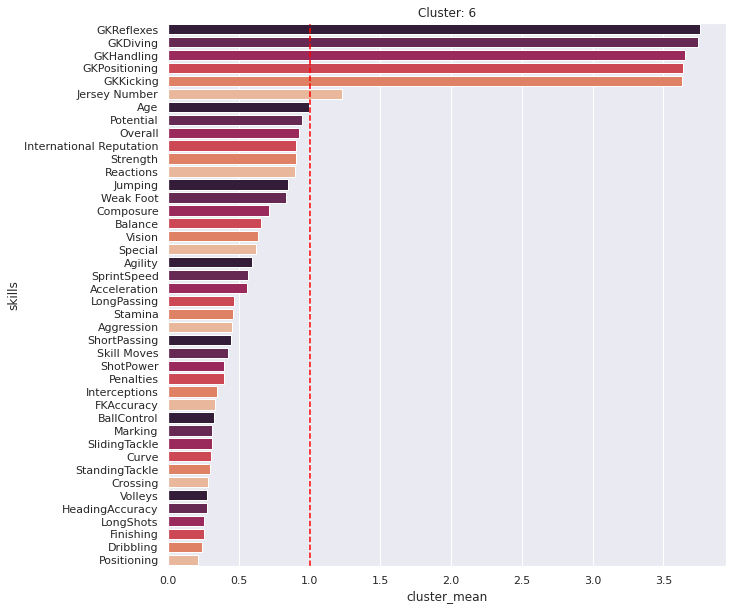

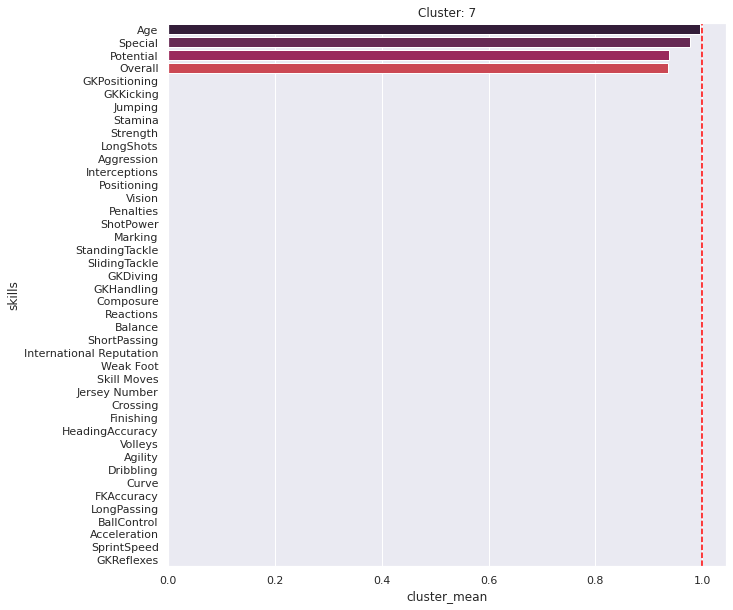

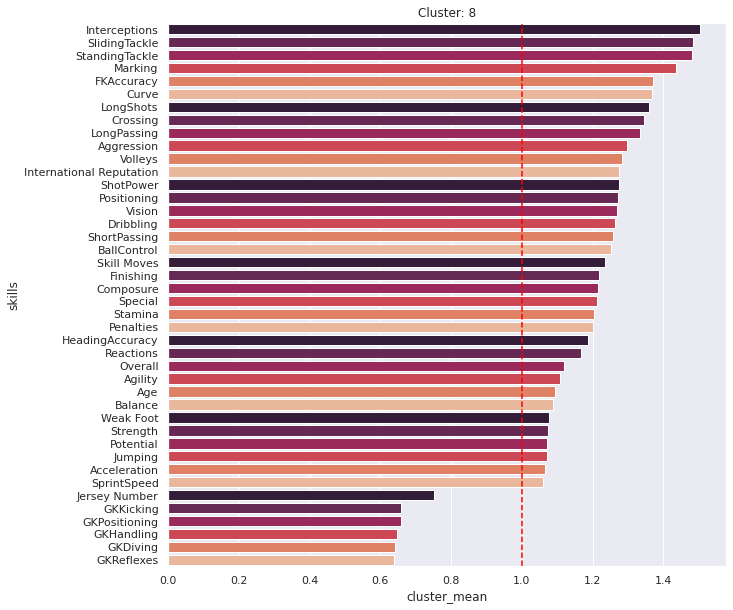

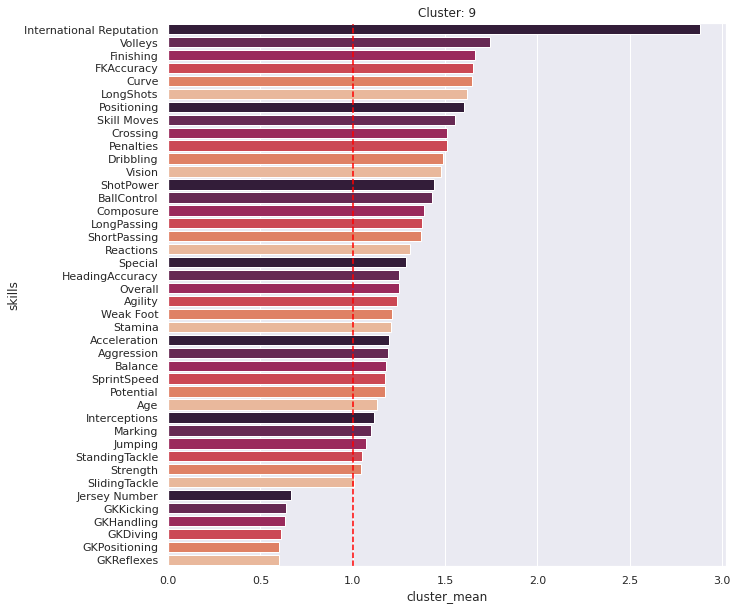

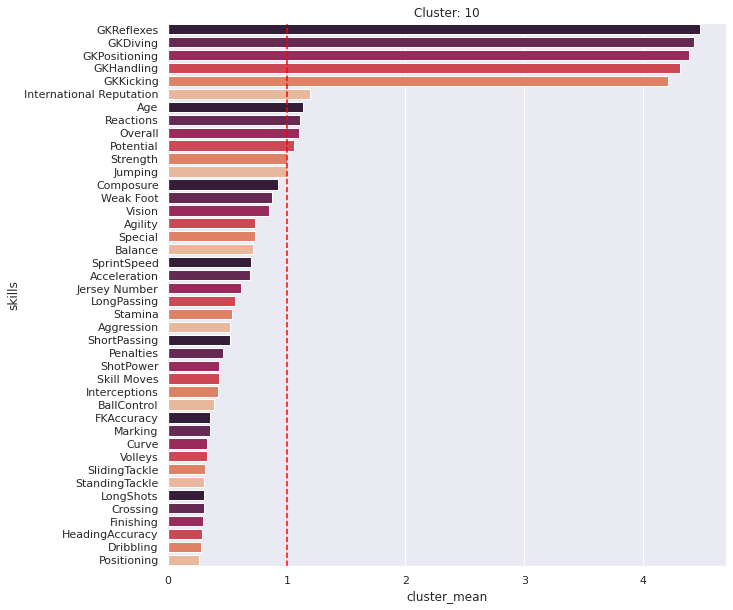

In [30]:
for label in range(11):
  overall_mean = []
  cluster_mean = []
  for i,skillname in enumerate(df.columns[:-1]):
    mu = df[skillname].mean()
    cluster_mean.append(df[df['labels'] == label][skillname].mean()/mu)
  
  to_plot = pd.DataFrame({'skills':df.columns[:-1],'cluster_mean':cluster_mean})
  to_plot = to_plot.sort_values(by=['cluster_mean'],ascending=False)
  fig,ax = plt.subplots(figsize=(10,10))
  sns.barplot(y='skills', x='cluster_mean', data=to_plot,ax = ax,palette=sns.color_palette("rocket"))
  ax.axvline(x=mu/mu, color="red", linestyle="--")
  plt.title("Cluster: "+str(label))

## 2D PCA


In [39]:
from sklearn.decomposition import PCA


X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [40]:
pca_2d = PCA(n_components=2).fit_transform(X)

<Figure size 432x288 with 0 Axes>

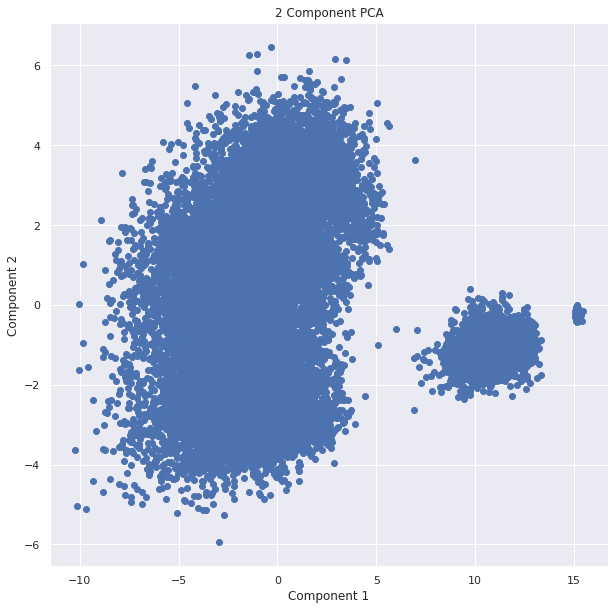

In [41]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(pca_2d[:,0], pca_2d[:,1])

In [42]:
K = [4,20,50]
models = []
sses = []
scores = []
samples = []
distortion = []
for k in K:
  model = AgglomerativeClustering(k)
  model.fit(pca_2d)
  scores.append(silhouette_score(pca_2d,model.labels_))
  samples.append(silhouette_samples(X,model.labels_))
  models.append(model)
  print("For "+str(k)+" Silhoutte_Score = "+str(silhouette_score(pca_2d,model.labels_)))
  

For 4 Silhoutte_Score = 0.4338613386344639
For 20 Silhoutte_Score = 0.2956610508952299
For 50 Silhoutte_Score = 0.2649153450546049


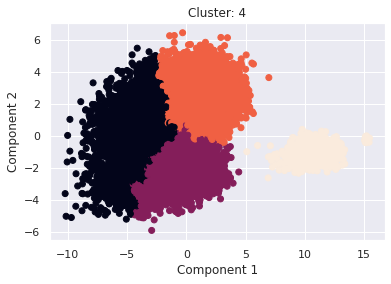

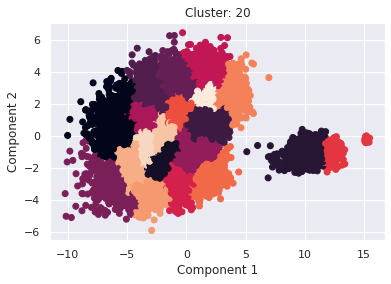

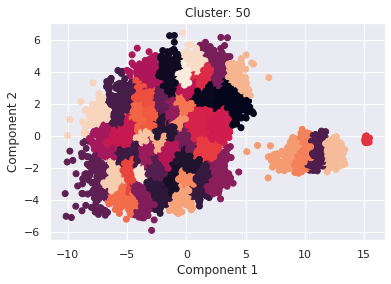

In [44]:
for j in range(len(K)):
  plt.figure()
  colors = [int(i) for i in models[j].labels_]
  plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c = colors)
  # plt.scatter(models[j].centroids_[:, 0], models[j].centroids_[:, 1], c='y', s=100)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.title('Cluster: '+str(K[j]))
  plt.show()

## PCA 3D


In [45]:
from sklearn.decomposition import PCA


X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [46]:
pca_3d = PCA(n_components=3).fit_transform(X)

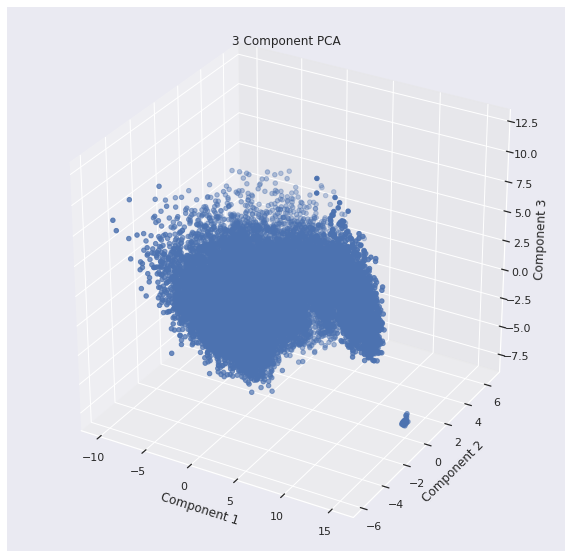

In [47]:
ax = plt.figure(figsize=(10,10)).gca(projection = '3d')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('3 Component PCA')
ax.scatter(pca_3d[:,0], pca_3d[:,1],pca_3d[:,2])

In [48]:
K = [4,20,50]
models = []
sses = []
scores = []
samples = []
distortion = []
for k in K:
  kmeans = AgglomerativeClustering(k)
  kmeans.fit(pca_3d)
  scores.append(silhouette_score(pca_3d,kmeans.labels_))
  samples.append(silhouette_samples(X,kmeans.labels_))
  models.append(kmeans)
  print("For "+str(k)+" Silhoutte_Score = "+str(silhouette_score(pca_3d,kmeans.labels_)))
  

For 4 Silhoutte_Score = 0.3149518235110633
For 20 Silhoutte_Score = 0.24954384265157162
For 50 Silhoutte_Score = 0.19750354315769428


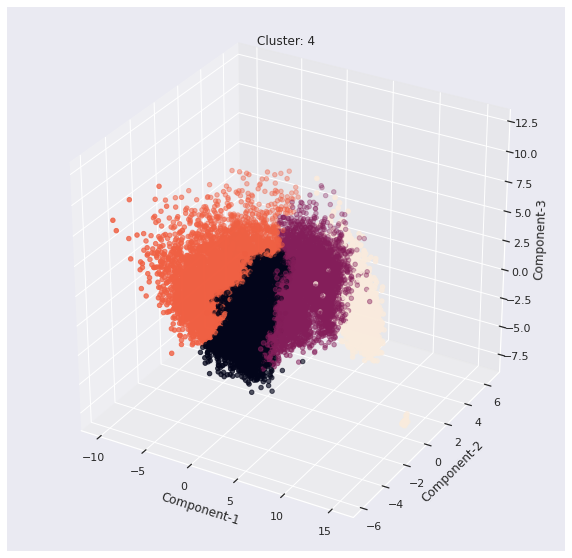

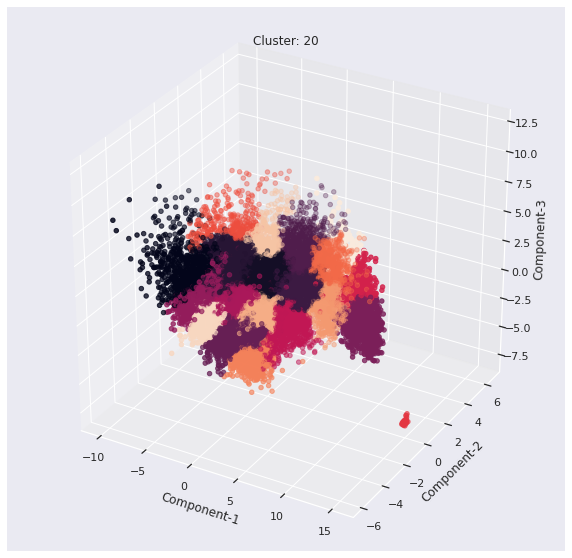

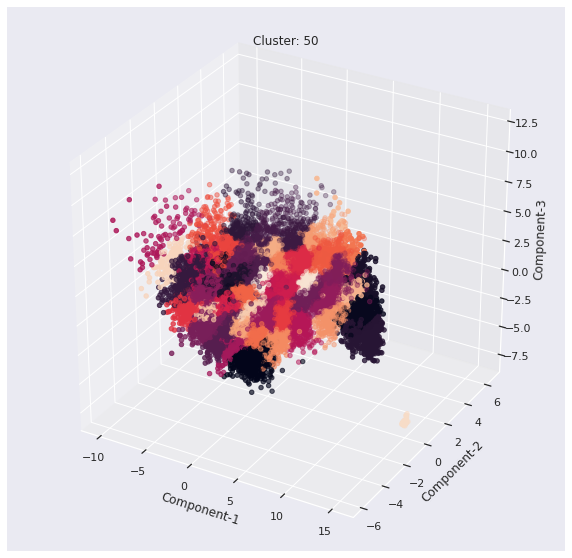

In [49]:
for j in range(len(K)):
  ax = plt.figure(figsize=(10,10)).gca(projection = '3d')
  colors = [int(i) for i in models[j].labels_]
  ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:,2], c = colors)
  ax.set_xlabel('Component-1')
  ax.set_ylabel('Component-2')
  ax.set_zlabel('Component-3')
  plt.title('Cluster: '+str(K[j]))
  plt.show()

# Divisive Strategy


In [72]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import copy

class DivisiveClustering:
	'''
	Class which implements the DIANA (Divisive Analysis) algorithm and provides an interface for using the implementation.
	'''
	def __init__(self):
		'''
		Initializer for the DivisiveClustering class.
		This function initializes some important class variables.
		'''
		self.clusters={}
		self.dist_matrix=None
		self.mapping=None
		self.no_clusters=0
		self.linkage_matrix=None
		self.n=None
		self.hierarchical_clusters={}
		self.last_index=None

	def initialize(self):
		'''
		Initializer for the DivisiveClustering class.
		Parameters
		----------
		path : string
		    path to file containinng transactions.
		
		Returns
		----------
		transactions : list
			list containing all transactions. Each transaction is a list of
			items present in that transaction.
		items : list
			list containing all the unique items.
		'''
		self.n=len(self.mapping)
		self.last_index=2*self.n-2
		self.i=0
		self.clusters[self.last_index]=list(self.mapping.keys())
		self.linkage_matrix=np.zeros([self.n-1, 4])

	def splinter(self):
		'''
		This function finds the cluster with the largest diameter and finds the splinter element.
		Returns
		----------
		splinter_element : int
			the splinter element. This element will be removed from the cluster that is being split.
		max_diameter_cluster : int
			index of the cluster with the largest diameter. This is the cluster which will be split.
		'''
		cluster_diameters={k:(len(v)<1)*(-1)+(len(v)>1)*np.max(self.dist_matrix[np.ix_(v,v)]) for k,v in self.clusters.items()}
		max_diameter_cluster=max(cluster_diameters, key=cluster_diameters.get)
		avg_within_cluster_distances={pt:(np.sum(self.dist_matrix[np.ix_(self.clusters[max_diameter_cluster], [pt])])/(len(self.clusters[max_diameter_cluster])-1)) for pt in self.clusters[max_diameter_cluster]}
		splinter_element=max(avg_within_cluster_distances, key=avg_within_cluster_distances.get)
		self.no_clusters+=1
		return splinter_element, max_diameter_cluster

	def reassign(self, splinter_element, orig_cluster_key):
		'''
		Function which reassigns points between the original cluster and the splinter cluster.
		Parameters
		----------
		splinter_element : int
		    the splinter element.
		orig_cluster_key : int
		    the ID of the element to be split.
		'''
		# Create temp clusters
		temp_new_cluster=[splinter_element]
		self.clusters[orig_cluster_key].remove(splinter_element)
		temp_orig_cluster=self.clusters[orig_cluster_key]

		# Remove orig cluster from cluster dict
		del self.clusters[orig_cluster_key]

		# Calculate distances
		within_cluster_dist={pt:np.mean(self.dist_matrix[np.ix_(temp_orig_cluster,[pt])]) for pt in temp_orig_cluster }
		dist_to_splinter={pt:self.dist_matrix[pt, splinter_element]  for pt in temp_orig_cluster}
		dist_diff={pt:(within_cluster_dist[pt] - dist_to_splinter[pt]) for pt in temp_orig_cluster} # if +ve, move to splinter
		
		# Reassign points
		for pt in temp_orig_cluster:
			if dist_diff[pt]>0 and len(temp_orig_cluster)>1:
				temp_new_cluster.append(pt)
				temp_orig_cluster.remove(pt)
		
		dist_bw_clusters=np.max(self.dist_matrix[np.ix_(temp_orig_cluster, temp_new_cluster)])
		
		# Add temp clusters to cluster dict
		if len(temp_orig_cluster)==1:
			self.clusters[temp_orig_cluster[0]]=temp_orig_cluster
			orig_cluster_key=temp_orig_cluster[0]
		else:
			self.last_index-=1
			self.clusters[self.last_index]=temp_orig_cluster
			orig_cluster_key=self.last_index

		if len(temp_new_cluster)==1:
			self.clusters[temp_new_cluster[0]]=temp_new_cluster
			new_cluster_key=temp_new_cluster[0]
		else:
			self.last_index-=1
			self.clusters[self.last_index]=temp_new_cluster
			new_cluster_key=self.last_index

		# Append to hierarchical clusters
		self.hierarchical_clusters['iter_'+str(self.no_clusters)]=copy.deepcopy(self.clusters)

		# Make the linkage function
		self.make_linkage_function(new_cluster_key, orig_cluster_key, dist_bw_clusters, len(temp_new_cluster)+len(temp_orig_cluster))

	def make_linkage_function(self, cluster_1, cluster_2, dist, len_cluster_2):
		'''
		Function to create the linakge matrix 'Z' for the dendrogram.
		Parameters
		----------
		cluster_1 : int
		    the ID of the first cluster.
		cluster_2 : string
		    the ID of the first cluster.
		dist : string
		    distance between the newly formed clusters.
		len_cluster_2 : string
		    number of elements in the original cluster which was later split.
		'''
		self.linkage_matrix[self.n-self.no_clusters-1, 0]=cluster_2
		self.linkage_matrix[self.n-self.no_clusters-1, 1]=cluster_1
		self.linkage_matrix[self.n-self.no_clusters-1, 2]=dist
		self.linkage_matrix[self.n-self.no_clusters-1, 3]=len_cluster_2

	def termination(self):
		'''
		Function to check whether clustering has termianted.
		Clustering has terminated when there's only one element in all of the clusters.
		Returns
		----------
		terminated : int (0 or 1)
			function returns 1 on termination. 0 otherwise.
		'''
		for k, v in self.clusters.items():
			if len(v)>1:
				return 0
		return 1

	def fit(self, dist_matrix, mapping):
		'''
		Function that fits the data on the HierarchicalCLustering model.
		Parameters
		----------
		dist_matrix : numpy ndarray
		    the distance matrix.
		mapping : dict
		    mapping of the cluster ids to original names from dataset.
		'''
		self.dist_matrix=dist_matrix
		self.mapping=mapping
		self.initialize()
		while not self.termination():
			splinter_element, orig_cluster_key=self.splinter()
			self.reassign(splinter_element, orig_cluster_key)
		print('Clustering done!')

	def create_dendrogram(self):
		'''
		Function to create the dendrogram using the linakge matrix and save it to file.
		'''
		fig=plt.figure(figsize=(18, 8))
		plt.title("Dendrogram - Divisive Clustering")
		labels=['temp']*len(self.mapping)
		for idx,label in self.mapping.items():
			labels[idx]=label
		labels=np.array(labels)
		dendrogram(self.linkage_matrix, orientation='top', labels=labels)
		fig.savefig('dendrogram_divisive.png')
		plt.show()

In [66]:
X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [77]:
from sklearn.metrics.pairwise import euclidean_distances
sample = 5000

In [78]:
model = DivisiveClustering()

In [79]:
mapping={ind:ind for ind in range(sample)}
dist_mtx = euclidean_distances(X[:sample])
model.fit(dist_mtx,mapping)

Clustering done!


## Dendrogram of Decisive Strategy

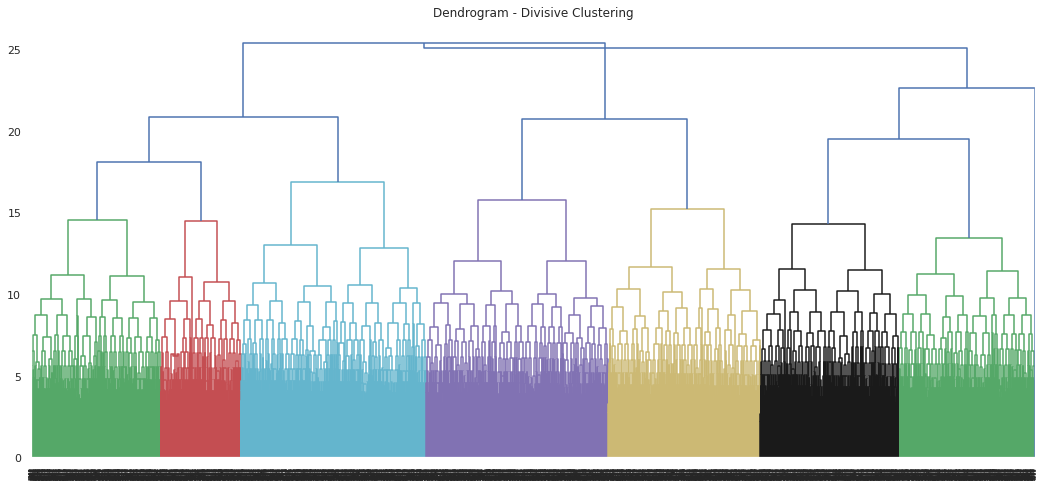

In [80]:
model.create_dendrogram()